In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from pyclustering.cluster.clarans import clarans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import neighbors


from classification_viz import plot_decisions_2d

## 1: Load the Iris df

In [156]:
# Download dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, header=None, names=["sepal_length", "sepal_width", "petal_length", "petal_width", "class"])
print(df.head())


   sepal_length  sepal_width  petal_length  petal_width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


## 2: Write a short documentation of the dataset

In [157]:
# print(df.describe(),df.info(), df.shape)

Documentation: The Iris datasets consists of 150 entries and 5 Variables including 4 numeric features: sepal length, sepal width, petal length and petal width, and their accoring species. 

In [158]:
df.iloc[0,:]

sepal_length            5.1
sepal_width             3.5
petal_length            1.4
petal_width             0.2
class           Iris-setosa
Name: 0, dtype: object

In [159]:
X_1 = df.iloc[:,[2,3]]
y_1 = df.iloc[:,4]

In [160]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X[:,[2,3]], y, test_size=0.4, shuffle=True, stratify=y, random_state=1)

In [162]:
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1, test_size=0.4, shuffle=True, stratify=y, random_state=1)

In [163]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(90, 2) (90,) (60, 2) (60,)


In [164]:
scaler = MinMaxScaler()
X_1_train_sc = scaler.fit_transform(X_1_train)
X_1_test_sc = scaler.transform(X_1_test)

In [165]:
scaler = MinMaxScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [166]:
# X_train_sc = X_train
# X_test_sc = X_test

Random Baseline:

In [167]:
# y_train.value_counts()

In [168]:
correct = (y_test == 'Iris-virginica').sum()
correct/len(y_test)

0.0

A baseline that guesses Iris-virginica has an accuracy score of: 33%

In [169]:
# Lets start with an arbitrary choice of parameters
clf1 = neighbors.KNeighborsClassifier(3, 
    weights='uniform', 
    metric="euclidean", algorithm="brute")

# Train the classifier
clf1.fit(X_train_sc, y_train)

KNeighborsClassifier(algorithm='brute', metric='euclidean', n_neighbors=3)

In [170]:
y_test_pred = clf1.predict(X_test_sc)

In [171]:
from sklearn import metrics
scaled_acc= round(metrics.accuracy_score(y_test, y_test_pred),3)
print(scaled_acc)

1.0


In [172]:
def get_acc(k, voting, metric):
    clf = neighbors.KNeighborsClassifier(k, weights=voting, metric=metric, algorithm="brute")
    clf.fit(X_train_sc, y_train)
    y_test_pred = clf.predict(X_test_sc)
    acc=metrics.accuracy_score(y_test, y_test_pred)
    #print(k, voting, round(acc, 3))
    return acc


uniform_euclidean_acc=[]
distance_euclidean_acc=[]
uniform_manhattan_acc=[]
distance_manhattan_acc=[]
for k in range(1,11):
    uniform_euclidean_acc.append(get_acc(k, 'uniform', 'euclidean'))
    distance_euclidean_acc.append(get_acc(k, 'distance', 'euclidean'))
    uniform_manhattan_acc.append(get_acc(k, 'uniform', 'manhattan'))
    distance_manhattan_acc.append(get_acc(k, 'distance', 'manhattan'))


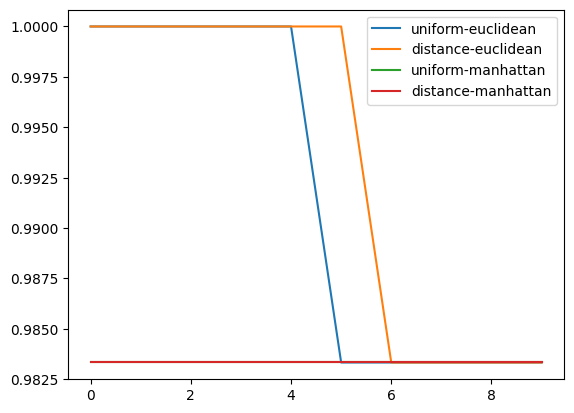

In [173]:
import matplotlib.pyplot as plt
plt.plot(range(10), uniform_euclidean_acc, label='uniform-euclidean')
plt.plot(range(10), distance_euclidean_acc, label='distance-euclidean')
plt.plot(range(10), uniform_manhattan_acc, label='uniform-manhattan')
plt.plot(range(10), distance_manhattan_acc, label='distance-manhattan')
plt.legend()

## Results:

baseline: 33.3%

stratified, no scaling: 98.3%

no stratification, scaling: 96.7%

stratified, scaled: 100%

The kNN algorythm performs better than the baseline and euclidean distance combined with distance scaling performes the best.


In [174]:
clf1

KNeighborsClassifier(algorithm='brute', metric='euclidean', n_neighbors=3)

In [175]:
# y  = y.astype('category').cat.codes

In [176]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [177]:
X.shape, y.shape, clf1

((150, 4),
 (150,),
 KNeighborsClassifier(algorithm='brute', metric='euclidean', n_neighbors=3))

In [178]:
type(clf1)

sklearn.neighbors._classification.KNeighborsClassifier

In [179]:
# # Ensure that X contains only numeric columns
# X = X.apply(pd.to_numeric, errors='coerce')
# # Ensure y is numeric
# y = pd.to_numeric(y, errors='coerce')


In [180]:
# X = X.dropna()
# y = y.dropna()


In [181]:
# X = np.array(X)
# y = np.array(y)


In [182]:
from classification_viz import plot_decisions_2d

In [183]:
# print(X.dtype)
# print(y.dtype)
# print(np.any(np.isnan(X)), np.any(np.isnan(y)))


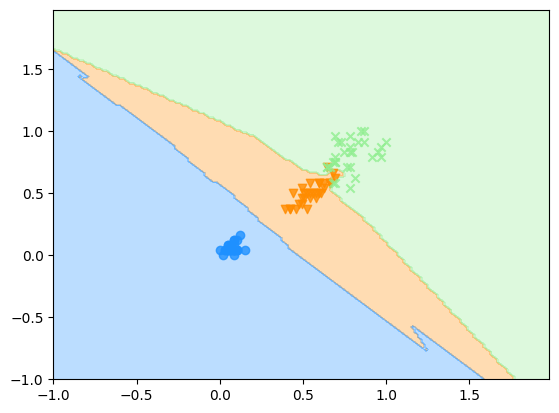

In [185]:
plot_decisions_2d(X_1_train_sc, y_1_train, clf1)
